# Expected Threat (xT)

Expected Threat is a new concept that will introduce the level of threat a pass, prior to a goal, brought. Click [here](https://alpscode.com/blog/expected_threat_optimization/) to understand more about it.

In [113]:
from statsbombpy import sb
import numpy as np
import warnings
import pandas as pd
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
comp= sb.competitions()

credentials were not supplied. open data access only


In [3]:
matches = sb.matches(11,90)

credentials were not supplied. open data access only


Atlético Madrid 1 - 0 Barcelona on the 21/11/2020.

ESPN claim that ["Barca captain Lionel Messi had a match to forget, creating very little danger"](https://www.espn.com/soccer/report/_/gameId/582103).

Let's see how Messi performed through his xT during the match.

# Messi's xT against Atlético Madrid

In [4]:
events = sb.events(3773656)

credentials were not supplied. open data access only


In [5]:
df = events[['id','team','player','position','pass_recipient','minute', 'second',
                    'type', 'location', 'pass_end_location', 'pass_outcome',
                   ]]

In [78]:
def get_passes(df):
    df['x'] = [i[0] for i in df['location'].values]
    df['y'] = [i[1] for i in df['location'].values]
    df['endX'] = [i[0] for i in df['pass_end_location'].values]
    df['endY'] = [i[1] for i in df['pass_end_location'].values]
    df = df.drop(['location', 'pass_end_location'], axis =1)
    return df

In [7]:
passes = df[df['type'] == 'Pass']

In [9]:
barca_pass = passes[passes['team'] == 'Barcelona'] 

In [22]:
messi_tot = barca_pass[barca_pass['player'] == 'Lionel Andrés Messi Cuccittini']

In [23]:
print(f"Messi made a total of {len(messi_tot)} regardless of if successful or not.") 

Messi made a total of 56 regardless of if successful or not.


In [24]:
messi_tot['pass_outcome'] = messi_tot['pass_outcome'].fillna('Nice')

In [71]:
messi_ = messi_tot[messi_tot['pass_outcome'] == 'Nice']

In [72]:
print(f"Messi attempted 56 passes and 40 of them are successful which is {round(len(messi_)/len(messi_tot), 2)} %")

Messi attempted 56 passes and 40 of them are successful which is 0.71 %


Let's see the total expected threat of those 40 passes

In [79]:
messi_ = get_passes(messi_)

In [80]:
messi_

,id,team,player,position,pass_recipient,minute,second,type,pass_outcome,x,y,endX,endY
59,33f28139-acd6-4d89-8681-864ebb549f8a,Barcelona,Lionel Andrés Messi Cuccittini,Center Attacking Midfield,Antoine Griezmann,3,11,Pass,Nice,76.2,57.1,83.0,70.8
122,ad88d12c-c697-4cb6-8400-4eb4a1b4e1c4,Barcelona,Lionel Andrés Messi Cuccittini,Center Attacking Midfield,Sergi Roberto Carnicer,6,59,Pass,Nice,56.9,55.7,56.5,65.7
128,afb7d82d-0558-4298-8db7-c72a8a9c657c,Barcelona,Lionel Andrés Messi Cuccittini,Center Attacking Midfield,Ousmane Dembélé,7,17,Pass,Nice,78.9,59.5,92.8,73.5
131,7ffb486c-8601-4755-b022-ad0dff0838ee,Barcelona,Lionel Andrés Messi Cuccittini,Center Attacking Midfield,Miralem Pjanić,7,23,Pass,Nice,85.0,48.7,83.6,54.9
201,c6096019-1217-4134-b791-7e79bab31f9d,Barcelona,Lionel Andrés Messi Cuccittini,Center Attacking Midfield,Sergi Roberto Carnicer,13,19,Pass,Nice,83.8,28.2,82.1,60.4
210,fd20daac-3e4e-4039-a696-fa81c128559c,Barcelona,Lionel Andrés Messi Cuccittini,Center Attacking Midfield,Ousmane Dembélé,14,28,Pass,Nice,56.5,33.7,110.0,55.4
212,6f545005-5573-4935-b96f-e149dea94d48,Barcelona,Lionel Andrés Messi Cuccittini,Center Attacking Midfield,Antoine Griezmann,15,6,Pass,Nice,120.0,80.0,117.0,48.5
218,f85bb31c-eb81-4086-a556-ad1527000b21,Barcelona,Lionel Andrés Messi Cuccittini,Center Attacking Midfield,Sergi Roberto Carnicer,15,46,Pass,Nice,90.8,72.9,79.2,70.2
225,601aab69-5d3c-4432-9b5a-f45773c2faa1,Barcelona,Lionel Andrés Messi Cuccittini,Center Attacking Midfield,Sergi Roberto Carnicer,16,7,Pass,Nice,86.0,76.1,79.5,76.1
247,3c380907-d3e6-4891-86a0-147bfbd0c5a8,Barcelona,Lionel Andrés Messi Cuccittini,Center Attacking Midfield,Miralem Pjanić,17,40,Pass,Nice,62.4,67.1,63.2,56.3


In [82]:
# import socceraction.xthreat as xthreat
# import socceraction.spadl as spadl

## xT grid

Expected threats were derived by leading clubs' analysts.

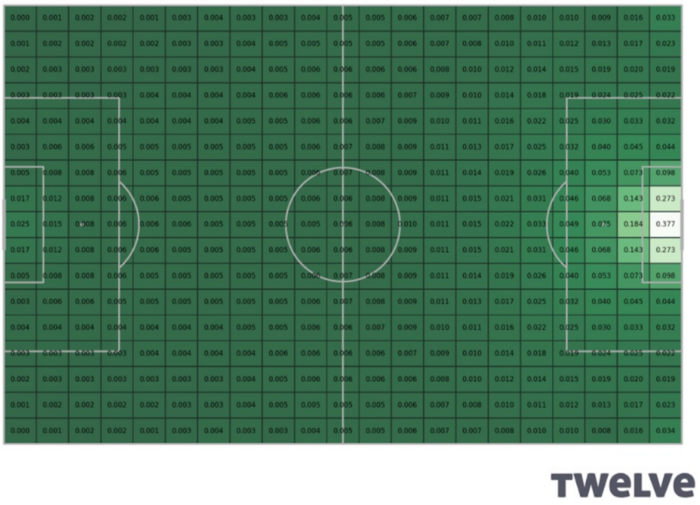

In [98]:
xT = pd.read_csv('../notebooks/data/xT_grid.csv', sep=';')

In [106]:
xT = xT.drop('Unnamed: 0', axis =1)

In [108]:
xT.columns = [1,2,3,4,5,6,7,8,9,10,11,12]

In [114]:
xT = np.array(xT)

In [116]:
xT_rows, xT_cols = xT.shape

In [ ]:
pd.cut(messi_['x'], bins = xT_cols, labels = False)

In [120]:
messi_['x1_bin'] = pd.cut(messi_['x'], bins = xT_cols, labels = False)
messi_['y1_bin'] = pd.cut(messi_['y'], bins = xT_rows, labels = False)
messi_['x2_bin'] = pd.cut(messi_['endX'], bins = xT_cols, labels = False)
messi_['y2_bin'] = pd.cut(messi_['endY'], bins = xT_rows, labels = False)

In [121]:
messi_

,id,team,player,position,pass_recipient,minute,second,type,pass_outcome,x,y,endX,endY,x1_bin,y1_bin,x2_bin,y2_bin
59,33f28139-acd6-4d89-8681-864ebb549f8a,Barcelona,Lionel Andrés Messi Cuccittini,Center Attacking Midfield,Antoine Griezmann,3,11,Pass,Nice,76.2,57.1,83.0,70.8,3,5,5,7
122,ad88d12c-c697-4cb6-8400-4eb4a1b4e1c4,Barcelona,Lionel Andrés Messi Cuccittini,Center Attacking Midfield,Sergi Roberto Carnicer,6,59,Pass,Nice,56.9,55.7,56.5,65.7,0,5,0,6
128,afb7d82d-0558-4298-8db7-c72a8a9c657c,Barcelona,Lionel Andrés Messi Cuccittini,Center Attacking Midfield,Ousmane Dembélé,7,17,Pass,Nice,78.9,59.5,92.8,73.5,4,5,7,7
131,7ffb486c-8601-4755-b022-ad0dff0838ee,Barcelona,Lionel Andrés Messi Cuccittini,Center Attacking Midfield,Miralem Pjanić,7,23,Pass,Nice,85.0,48.7,83.6,54.9,5,4,5,5
201,c6096019-1217-4134-b791-7e79bab31f9d,Barcelona,Lionel Andrés Messi Cuccittini,Center Attacking Midfield,Sergi Roberto Carnicer,13,19,Pass,Nice,83.8,28.2,82.1,60.4,5,2,5,6
210,fd20daac-3e4e-4039-a696-fa81c128559c,Barcelona,Lionel Andrés Messi Cuccittini,Center Attacking Midfield,Ousmane Dembélé,14,28,Pass,Nice,56.5,33.7,110.0,55.4,0,3,10,5
212,6f545005-5573-4935-b96f-e149dea94d48,Barcelona,Lionel Andrés Messi Cuccittini,Center Attacking Midfield,Antoine Griezmann,15,6,Pass,Nice,120.0,80.0,117.0,48.5,11,7,11,4
218,f85bb31c-eb81-4086-a556-ad1527000b21,Barcelona,Lionel Andrés Messi Cuccittini,Center Attacking Midfield,Sergi Roberto Carnicer,15,46,Pass,Nice,90.8,72.9,79.2,70.2,6,7,4,7
225,601aab69-5d3c-4432-9b5a-f45773c2faa1,Barcelona,Lionel Andrés Messi Cuccittini,Center Attacking Midfield,Sergi Roberto Carnicer,16,7,Pass,Nice,86.0,76.1,79.5,76.1,5,7,4,7
247,3c380907-d3e6-4891-86a0-147bfbd0c5a8,Barcelona,Lionel Andrés Messi Cuccittini,Center Attacking Midfield,Miralem Pjanić,17,40,Pass,Nice,62.4,67.1,63.2,56.3,1,6,1,5


Index 59: the pass would be located on the 3rd columns and 5th row of the xT grid and the end of the pass the 5th column and the 7th row

In [123]:
messi_['start_zone_value'] = messi_[['x1_bin', 'y1_bin']].apply(lambda x: xT[x[1]][x[0]], axis = 1)
messi_['end_zone_value'] = messi_[['x2_bin', 'y2_bin']].apply(lambda x: xT[x[1]][x[0]], axis = 1)

In [125]:
messi_['xT'] = messi_['start_zone_value'] - messi_['end_zone_value']

In [129]:
messi_['xT'].sum()

-0.60769293

Messi had a negative impact on the game because of his regressive passes.